<a href="https://colab.research.google.com/github/TamTran72111/learn-ml-dl/blob/master/Augelien_Geron_book/06_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'><b><h3>Training and Visualizing a Decision Tree</h3></b></font>

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]      # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
from sklearn.tree import export_graphviz
import os

export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
)

In [7]:
!dot -Tpng iris_tree.dot -o iris_tree.png

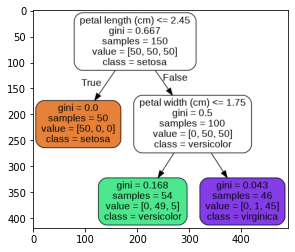

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

pil_im = Image.open('iris_tree.png')
plt.imshow(np.asarray(pil_im))

<font color='red'><b><h3>Making Predictions</h3></b></font>

**Gini impurity**

\begin{equation*}
G_i = 1 - \sum^n_{k=1}p_{i,k}^2
\end{equation*}

$p_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node

**Entroy impurity**

\begin{equation*}
H_i = -\sum^n_{k=1,p_{i,k}\ne0}p_{i,k}log_2(p_{i,k})
\end{equation*}

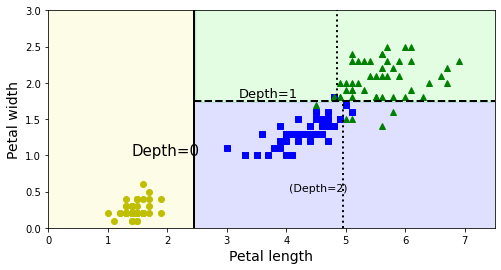

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  if not iris:
    custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
  if plot_training:
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Iris setosa')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris versicolor')
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris virginica')
    plt.axis(axes)
  if iris:
    plt.xlabel('Petal length', fontsize=14)
    plt.ylabel('Petal width', fontsize=14)
  else:
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
  if legend:
    plt.legend(loc='lower right', fontsize=14)


plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth=2)
plt.text(1.4, 1, 'Depth=0', fontsize=15)
plt.text(3.2, 1.8, 'Depth=1', fontsize=13)
plt.text(4.05, 0.5, '(Depth=2)', fontsize=11)

plt.show()

<font color='red'><b><h3>Estimating Class Probabilities</h3><b></font>

In [10]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
tree_clf.predict([[5, 1.5]])

array([1])

<font color='red'><b><h3>Regression</h3></b></font>

In [12]:
from sklearn.tree import DecisionTreeRegressor

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [13]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [14]:
export_graphviz(
    tree_reg,
    out_file='regression_tree.dot',
    feature_names=['x1'],
    rounded=True,
    filled=True
)

In [15]:
!dot -Tpng regression_tree.dot -o regression_tree.png

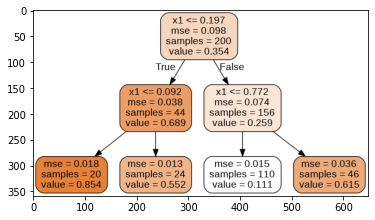

In [17]:
pil_im = Image.open('regression_tree.png')
plt.imshow(np.asarray(pil_im))

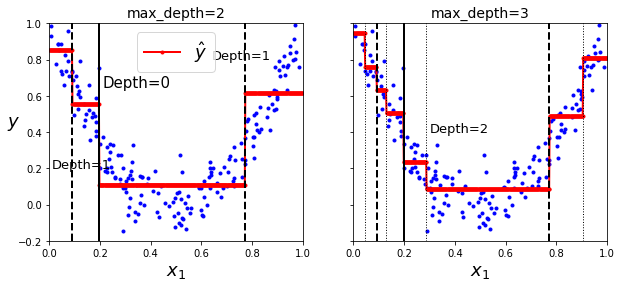

In [22]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel='$y$'):
  x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
  y_pred = tree_reg.predict(x1)
  plt.axis(axes)
  plt.xlabel('$x_1$', fontsize=18)
  if ylabel:
    plt.ylabel(ylabel, fontsize=18, rotation=0)
  plt.plot(X, y, 'b.')
  plt.plot(x1, y_pred, 'r.-', linewidth=2, label=r'$\hat{y}$')


fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
  plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, 'Depth=0', fontsize=15)
plt.text(0.01, 0.2, 'Depth=1', fontsize=13)
plt.text(0.64, 0.8, 'Depth=1', fontsize=13)
plt.legend(loc='upper center', fontsize=18)
plt.title('max_depth=2', fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=False)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
  plt.plot([split, split], [-0.2, 1], style, linewidth=2)

for split in (0.0468, 0.1298, 0.2873, 0.9040):
  plt.plot([split, split], [-0.2, 1], 'k:', linewidth=1)

plt.text(0.3, 0.4, 'Depth=2', fontsize=13)
plt.title('max_depth=3', fontsize=14)

plt.show()

<font color='red'><b><h3>Exercise</h3></b></font>

In [23]:
# Question 7
# a. Generate a moons dataset using make_moons(n_samples=10_000, noise=0.4)
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10_000, noise=0.4, random_state=42)

In [24]:
# b. Use train_test_split() to split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# c. Use grid search with cross-validation to find good hyperparameter values for 
# DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    8.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [26]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [27]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

In [28]:
# Question 8
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=(len(X_train) - n_instances), random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
  X_mini_train = X_train[mini_train_index]
  y_mini_train = y_train[mini_train_index]
  mini_sets.append((X_mini_train, y_mini_train))

In [29]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
  tree.fit(X_mini_train, y_mini_train)

  y_pred = tree.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054499999999999

In [30]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
  Y_pred[tree_index] = tree.predict(X_test)

In [31]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [32]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872